# Normal Distribution in Python

Date: 2020-11-03

## Scenario

It has been suggested by researchers that average fin width of sky mermaids may reasonably be modelled by a normal distribution with mean 60cm and standard deviation 5cm.

-----

## Questions

**(a)** State and plot the distribution.

**(b)** According to the model, what proportion of fin sizes are...

**(i)** less than 62cm?

**(ii)** greater than 65cm??

**(c)** Calculate the value, $f_{1}$, of fin widths that is, according to the model, not exceeded by 95% of sky mermaids.

**(d)** What is the fin width, $f_{2}$, such that, according to the model, only 15% of fin widths in the population are smaller?

**(e)** Sky mermaids do not measure their fin widths in unit cm. Instead they use their own units called *tinsotuna*.
The conversion of tinsotuna, $T$, into centimeters, $F$, can be done by the following formula:

$$
T = \frac{4}{5}F + 16.
$$

What is the distribution of fin width in unit of length tinsotuna?

**(f)** What is the interquartile range of the distribution of sky mermaid fin lengths in unit of length tinsotuna?

-----



In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

## (a)

Let $F$ denote the fin size (in centimeters) of sky mermaids. From the question we know $F \sim N(60, 5^{2})$.

In [2]:
# distribution in cms
f = stats.norm(loc=60, scale=5)

# standard normal
z = stats.norm()

Plot the model.

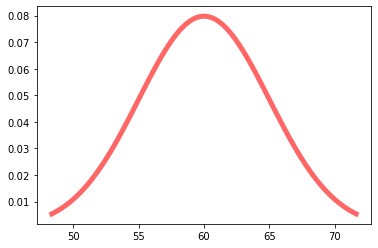

In [3]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(f.ppf(0.01),
                f.ppf(0.99), 100)
ax.plot(x, f.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

## (b)

Any normal distribution $X \sim N(\mu, \sigma^{2})$ can be transformed into the **standard normal distribution** $Z \sim N(0,1)$ using the following expression

$$
Z = \frac{X - \mu}{\sigma} \sim N(0,1).
$$

We know that $F \sim N(60,5^{2})$, so

$$
Z = \frac{F - 60}{5} \sim N(0,1).
$$

### (i)

The proportion of sky mermaids that have a fin width of less than 62cm is given by

$$
\begin{aligned}
    P(X \leq 62) &= P\bigg( \frac{F - 60}{5} < \frac{62 - 60}{5} \bigg) \\
    &= P(Z < 0.40) \\
    &= \Phi{(0.40)} \\
    &= \ldots
\end{aligned}
$$

In [4]:
f.cdf(x=62)

0.6554217416103242

Let us check this matches the standard normal distribution

In [5]:
z.cdf(x=0.4)

0.6554217416103242

### (ii)

The proportion of sky mermaids that have a fin width of greater than 65cm is given by

$$
\begin{aligned}
    P(X \geq 65) &= 1 - P\bigg( Z < \frac{65 - 60}{5} \bigg) \\
    &= 1 - P(Z < 1) \\
    &= 1 - \Phi{(1}) \\
    &= \ldots
\end{aligned}
$$

In [6]:
f.sf(x=65)

0.15865525393145707

Let us again check this matches the standard normal distribution

In [7]:
z.sf(x=1)

0.15865525393145707

## (c)

The fin width, $f_{1}$, that is not exceeded by 95% of sky mermaids is the 0.95-quantile of $F \sim N(60,5^{2})$.

If $q_{\alpha}$ is the $\alpha$-quantile of $N(0,1)$, then the $\alpha$-quantile, $x$, of $N(\mu, \sigma^{2})$ is given by

$$
x = \sigma q_{\alpha} + \mu.
$$

Reading from the table of quantiles for the standard normal distribution, $q_{0.95} = 1.645$. So, the fin width of sky mermaids, $f_{1}$, that is not exceeded by 95% of sky mermaids is given by

$$
f = 5(1.645) + 60 = \ldots
$$

In [8]:
f.ppf(q=0.95)

68.22426813475737

## (d)

The fin width, $f_{2}$, such that only 15% of fin widths is smaller than it is the 0.15-quantile of $F \sim N(60,5^{2})$. This can be rephrased as $f_{2}$ is the fin width that is exceeded by 85% of sky mermaids.

We know that $q_{\alpha} = -q_{(1-\alpha)}$, so $q_{0.15} = -q_{(1-0.15)} = -q_{0.85}$. Reading from the table of quantiles for the standard normal distribution, $q_{0.85} = 1.036$. So the fin width of sky mermaids, $f_{2}$, that is exceeded by 85% of sky mermaids is given by

$$
f = 5(-1.036) + 60 = \ldots
$$

In [9]:
# calculate using scipy
f.ppf(q=0.15)

54.81783305253105

## (e)

The fin width of sky mermaids in centimetres, $F$, is distributed $N(60, 5^{2}) = N(60, 25)$, and we know that $T$, the fin width in unit of length tinsotuna, is related to $F$ by the equation

$$
T = \frac{4}{5}F + 16.
$$

Now, if a a random variable $X$ has a normal distribution with mean $\mu$ and variance $\sigma^{2}$, and $Y = aX + b$ for constants $a$ and $b$, then

$$
Y = aX + b \sim N(a \mu + b, a^{2} \sigma^{2}).
$$

So $T$ is normally distributed with

$$
E(T) = \frac{4}{5} E(F) + 16 = \bigg( \frac{4}{5} \bigg) 60 + 16 = 64,
$$

and

$$
V(Y) = \bigg( \frac{4}{5} \bigg)^{2} V(X) = \bigg( \frac{16}{25} \bigg) 25 = 16.
$$

So, $T \sim N(64, 4^{2})$.

## (f)

The interquartile range is $q_{U} - q_{L} = q_{0.75} - q_{0.25}$.

Recall that, if $q_{\alpha}$ is the $\alpha$-quantile of $N(0,1)$, then the $\alpha$-quantile, $x$, of $N(\mu, \sigma^{2})$ is given by

$$
x = \sigma q_{\alpha} + \mu.
$$

Also recall that

$$
q_{\alpha} = -q_{(1 - \alpha)}.
$$

Reading from the table of quantiles for the standard normal distribution, 

$$q_{0.75} = 0.6745$$

and

$$q_{0.25} = -q_{1 - 0.25} = -q_{0.75} = -0.6745.$$

So the 0.75-quantile and 0.25-quantile of $T$, $t_{U}$ and $t_{L}$ respectively, are

$$
\begin{aligned}
    &t_{U} = 4(0.6745) + 64 = 66.698, \text{ and} \\
    &t_{L} = 4(-0.6745) + 64 = 61.302,
\end{aligned}
$$

and so therefore the interquartile range is

$$
t_{U} - t_{L} = 66.698 - 61.302 = \ldots
$$

In [10]:
# declare the transformed distribution
t = stats.norm(loc=64, scale=4)

t.ppf(q=0.75) - t.ppf(q=0.25)

5.395918001568653